In [36]:
# load libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from helper import getRecessionSpan
warnings.filterwarnings('ignore')

## Understand Data

I am using 129 macroeconomic monthly time series over the period 1959-2024 from FRED St. Louis designed by 
McCracken and Ng Source: https://research.stlouisfed.org/econ/mccracken/fred-databases/. The data is organized into 8 categories (1)output and income, (2)labor market, (3)housing, (4)consumption, orders and inventories, (5)money and credit, (6)interest and exchange rates, (7)prices and (8)stock market. 

In [37]:
bigmacro=pd.read_csv("data/Macroeconomic_Variables.csv")
bigmacro=bigmacro.rename(columns={'sasdate':'Date'})
bigmacro.head()

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1/1/1959,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1,2/1/1959,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
2,3/1/1959,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
3,4/1/1959,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
4,5/1/1959,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [38]:
Recession_periods=pd.read_csv('data/Recession_Periods.csv')

# adding recession periods as the second column
bigmacro.insert(loc=1,column="Regime", value=Recession_periods['Regime'].values)
bigmacro.head()

,Date,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1/1/1959,Normal,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1,2/1/1959,Normal,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
2,3/1/1959,Normal,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
3,4/1/1959,Normal,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
4,5/1/1959,Normal,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [39]:
bigmacro[["Date","Regime"]].groupby("Regime").count()

,Date
Regime,
Normal,693
Recession,95


## Explanatory Data Analysis

In [40]:
print(bigmacro.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Columns: 128 entries, Date to VIXCLSx
dtypes: float64(103), int64(23), object(2)
memory usage: 788.1+ KB
None


In [41]:
bigmacro.drop(['Date'],axis=1).describe(include = 'all')

,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
count,788,788.000000,788.000000,788.000000,7.870000e+02,788.000000,788.000000,788.000000,788.000000,788.000000,...,788.000000,788.000000,788.000000,788.000000,788.000000,634.00000,787.000000,787.000000,788.000000,746.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9519.405260,8109.921193,56.360840,8.224896e+05,220899.996462,67.507916,71.782490,70.555008,79.089704,...,62.934591,53.484547,12.650381,14.685698,11.670013,85.21735,136814.443494,351359.501487,1318.146341,19.307208
std,NaN,5023.714527,3979.218612,30.424369,3.859255e+05,186813.882719,26.806073,27.178523,27.450844,23.413408,...,30.939763,33.950231,7.890812,8.850789,7.097991,13.03659,138208.314703,336904.282639,1464.831585,7.082918
min,NaN,2583.560000,2426.000000,15.188000,2.659352e+05,18235.773920,21.961600,23.386800,22.262000,31.666400,...,18.280000,10.152000,2.130000,2.450000,2.040000,50.00000,6476.000000,12298.000000,71.186400,9.484400
25%,NaN,5145.454000,4569.650000,28.907750,4.877999e+05,50691.054080,44.904150,47.042050,44.855025,61.332075,...,32.665750,19.197250,5.082500,6.785000,4.672500,75.15000,10811.000000,34131.000000,186.727850,14.261675
50%,NaN,8292.729500,7257.300000,48.288500,7.188891e+05,161517.225100,62.516300,71.460250,69.544000,80.931900,...,67.068000,51.563000,11.845000,13.675000,11.245000,89.00000,80462.000000,188936.990000,707.898650,17.624250
75%,NaN,13723.953250,11440.475000,84.111250,1.172364e+06,357371.250000,95.042650,99.259200,98.436975,100.379725,...,90.534500,83.241500,19.140000,21.582500,17.630000,94.70000,266984.690000,728266.340000,2080.479725,22.535275


Let's look at performance of stock market over normal and recession periods. Below you can see the performance of SP500 over the period 1959-2024. Gray areas indicate recession periods in our dataset.

In [42]:
rec_spans = getRecessionSpan(bigmacro)
print(rec_spans)

[('4/1/1960', '2/1/1961'), ('12/1/1969', '11/1/1970'), ('11/1/1973', '3/1/1975'), ('1/1/1980', '7/1/1980'), ('7/1/1981', '11/1/1982'), ('7/1/1990', '3/1/1991'), ('3/1/2001', '11/1/2001'), ('12/1/2007', '6/1/2009'), ('2/1/2020', '4/1/2020')]


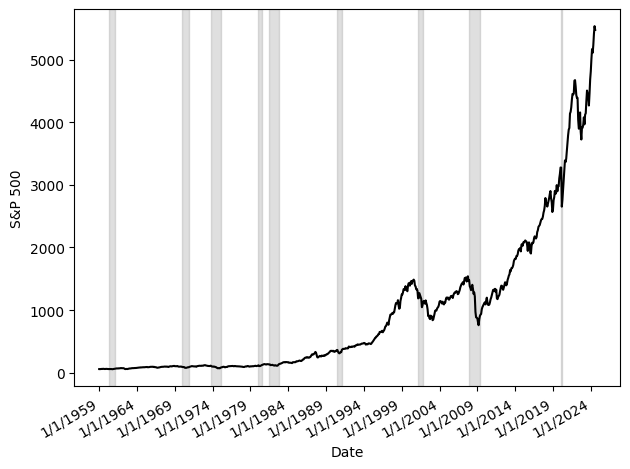

In [50]:



fig, ax = plt.subplots()
sns.lineplot(data=bigmacro, x="Date", y="S&P 500", color="black")



# set the frequency for labelling the xaxis
freq = int(60)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label
ax.set_xticklabels(bigmacro.iloc[::freq].Date)
# set the xticks at the same frequency as the xlabels
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
# nicer label format for dates
fig.autofmt_xdate()

plt.tight_layout()
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][1], alpha=0.25, color='grey')

plt.show()